**Project** **Description**

**Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low-income levels, or too many inquiries on an individual’s credit report, for example. Manually analyzing these applications is error-prone and time-consuming (and time is money!). Fortunately, this task can be automated with the power of machine learning, and pretty much every commercial bank does so nowadays. In this project, I will build an automatic credit card approval predictor using machine learning techniques, just like real banks do.**

**Intial Hypothesis**

--> My hypothesis for the credit card dataset is, it is going to be a classification problem as it depends on applicant getting the credit card approved or dissapproved, eligible or not eligible.

-->According to me Logistic Regression model is going to work better for this dataset.

-->I am going to fit this data set into other ML models like decision tree,random forest, knn also to ckeck the accuracy

-->I think Annual Income,age,education is going to play an important role in applicant getting the credit card approved or dissapproved

**Importing all the required libraries for the project**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Loding the dataset using pandas read and checking dataset info**

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Credit_card.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

**there is another dataset with status of applicant credit card approved or not. I going to load the dataset and check the info of dataset.**

In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/Credit_card_label.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ind_ID  1548 non-null   int64
 1   label   1548 non-null   int64
dtypes: int64(2)
memory usage: 24.3 KB


**I am going to join both the datasets with applicant id(Ind_ID) as key and analyze the data.**

In [ ]:
df3=df.join(df2.set_index('Ind_ID'), on='Ind_ID')
df3.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


**DATA PREPROCESSING**

**I going to start process of data preprocessing which include data cleaning,data transformation and data reduction.**


In [ ]:
df3.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

**Data cleaning is a major part of every data science project and every dataset can possibly have missing values for multiple columns.**

**After checkcing for null values in dataset, i found gender,annual income,birthday count and type occupation has null values. so i am going to fill the null values with mode for categorical column like gender,type occupation and fill null values with mean for numerical columns like annual income and birthday column.**

In [ ]:
df3['Type_Occupation'].mode()

0    Laborers
Name: Type_Occupation, dtype: object

In [ ]:
df3['Type_Occupation'].fillna(df3['Type_Occupation'].mode().iloc[0], inplace=True)


In [ ]:
df3['Type_Occupation'].isnull().sum()

0

In [ ]:
df3['GENDER'].fillna(df3['GENDER'].mode().iloc[0], inplace=True)

In [ ]:
df3['GENDER'].isnull().sum()

0

In [ ]:
df3['Annual_income'].fillna(df3['Annual_income'].mean(), inplace=True)


In [ ]:
df3['GENDER'].isnull().sum()

0

**As the birthday count column is in form of days and has negative value, i am going to convert the negative to positive values and days to years by dividing values with 365.25.**

In [ ]:
df3['Birthday_count'] = df3['Birthday_count'] * -1

In [ ]:
df3['age']=df3['Birthday_count']/365.25

In [ ]:
df3['age']

0       51.394935
1       37.117043
2             NaN
3       37.117043
4       37.117043
          ...    
1543    32.736482
1544    28.005476
1545    36.068446
1546    41.867214
1547    45.451061
Name: age, Length: 1548, dtype: float64

**I added a new column age in the dataset with age in form of years and fill the null values with mean of all values in age column.**

In [ ]:
df3['age'].fillna(df3['age'].mean(), inplace=True)


In [ ]:
df3.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,age
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,18772.0,365243,1,0,0,0,Laborers,2,1,51.394935
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,13557.0,-586,1,1,1,0,Laborers,2,1,37.117043
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,Laborers,2,1,43.916063
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,13557.0,-586,1,1,1,0,Laborers,2,1,37.117043
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,13557.0,-586,1,1,1,0,Laborers,2,1,37.117043


**the employed years column also has data in form of days which i am going to convert it to years.**

In [ ]:
df3['Employed_years'] = df3['Employed_days'].apply(lambda x: x / 365.25 if x < 0 else 0)

In [ ]:
df3['Employed_years'] = df3['Employed_years'] * -1

In [ ]:
df3.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,age,Employed_years
1543,5028645,F,N,Y,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,...,-2182,1,0,0,0,Managers,2,0,32.736482,5.973990
1544,5023655,F,N,N,0,225000.00000,Commercial associate,Incomplete higher,Single / not married,House / apartment,...,-1209,1,0,0,0,Accountants,1,0,28.005476,3.310062
1545,5115992,M,Y,Y,2,180000.00000,Working,Higher education,Married,House / apartment,...,-2477,1,0,0,0,Managers,4,0,36.068446,6.781656
1546,5118219,M,Y,N,0,270000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,...,-645,1,1,1,0,Drivers,2,0,41.867214,1.765914
1547,5053790,F,Y,Y,0,225000.00000,Working,Higher education,Married,House / apartment,...,-2859,1,0,0,0,Laborers,2,0,45.451061,7.827515


In [ ]:
df3_copy = df3.copy()
df3_copy.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,age,Employed_years
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,Laborers,2,1,51.394935,-0.000000
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,37.117043,1.604381
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,43.916063,1.604381
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,37.117043,1.604381
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,37.117043,1.604381


**Droping few columns which are not relevent for the model trainng.**

In [ ]:
df3.drop(['Employed_days', 'Birthday_count'], axis=1, inplace=True)


In [ ]:
df3.drop(['Mobile_phone','Work_Phone','Phone','EMAIL_ID'], axis=1, inplace=True)

In [ ]:
df3['label'].value_counts()

0    1373
1     175
Name: label, dtype: int64

**ML algorithms require all input variables to be of numeric type i.e. if the data contains categorical values, then we need to convert them to numerical before applying a machine learning algorithm. In our project, we will be using the label encoding from sklearn method to transform the categorical feature variables into numeric.**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df3['GENDER']=le.fit_transform(df3['GENDER'])
df3['Car_Owner']=le.fit_transform(df3['Car_Owner'])
df3['Propert_Owner']=le.fit_transform(df3['Propert_Owner'])
df3['Type_Income']=le.fit_transform(df3['Type_Income'])
df3['EDUCATION']=le.fit_transform(df3['EDUCATION'])
df3['Marital_status']=le.fit_transform(df3['Marital_status'])
df3['Housing_type']=le.fit_transform(df3['Housing_type'])
df3['Type_Occupation']=le.fit_transform(df3['Type_Occupation'])

In [ ]:
df3.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation,Family_Members,label,age,Employed_years
0,5008827,1,1,1,0,180000.00000,1,1,1,1,8,2,1,51.394935,-0.000000
1,5009744,0,1,0,0,315000.00000,0,1,1,1,8,2,1,37.117043,1.604381
2,5009746,0,1,0,0,315000.00000,0,1,1,1,8,2,1,43.916063,1.604381
3,5009749,0,1,0,0,191399.32623,0,1,1,1,8,2,1,37.117043,1.604381
4,5009752,0,1,0,0,315000.00000,0,1,1,1,8,2,1,37.117043,1.604381


**After transforming the dataset from categorical to numeric, I am going to divide the dataset with features(x) and target variable(y) to check the correlation between them using chi square test.**

In [ ]:
from sklearn.feature_selection import chi2
x=df3.drop(columns=['label'],axis=1)
y=df3['label']

In [ ]:
chi_scores=chi2(x,y)
chi_scores

(array([1.49550926e+02, 2.04350649e+00, 2.00586507e-01, 1.72495830e-01,
        1.05929098e+00, 7.37613387e+04, 6.15737764e+00, 6.70637444e-01,
        3.47002214e+00, 2.87732608e-03, 4.60440280e-01, 6.06296325e-01,
        9.35834404e+00, 1.03852628e+02]),
 array([2.17328916e-34, 1.52856935e-01, 6.54247850e-01, 6.77903143e-01,
        3.03376951e-01, 0.00000000e+00, 1.30865081e-02, 4.12829453e-01,
        6.24904743e-02, 9.57221419e-01, 4.97418280e-01, 4.36185727e-01,
        2.21972604e-03, 2.17938518e-24]))

**Chi square values of all the features are transformed to a barplot. as I can see only Annual income is highly correlated with the target variable(y).**

<Axes: >

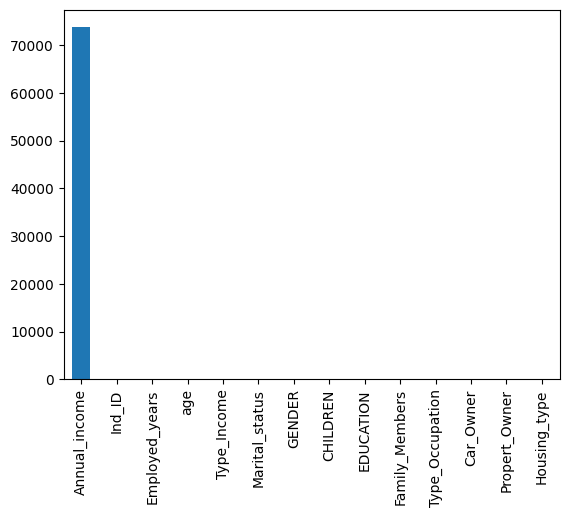

In [ ]:
#hiegher chi values,hgher the feature importantce
chi_values=pd.Series(chi_scores[0],index=x.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

**I am going to check the p values of all the features, if p value is higher than 0.5 , then that feature is no correlation with target variable. according to p value I am going to select the features.**

<Axes: >

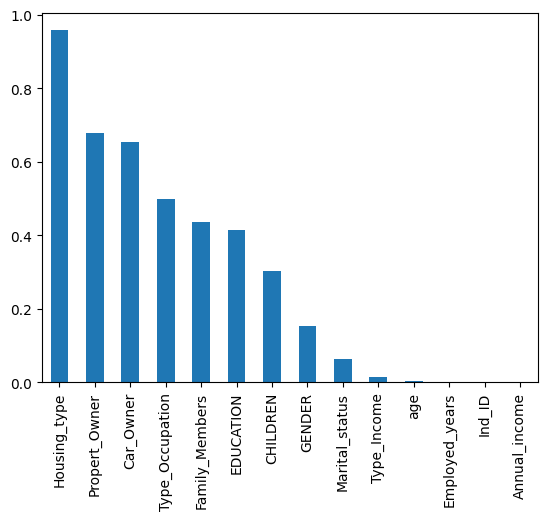

In [ ]:
#p-value>0.5,lower the feature importance
p_values=pd.Series(chi_scores[1],index=x.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()

**FEATURE SELECTION**

**I am going to drop all the columns which have less or no correlation with the target variable and select the features for model training and testing.**

In [ ]:
df3.drop(['Ind_ID'], axis=1, inplace=True)

In [ ]:
df3.drop(['Propert_Owner','EDUCATION','Housing_type','Car_Owner','Type_Occupation','CHILDREN','GENDER','Family_Members'], axis=1, inplace=True)

In [ ]:
df3.head()

,Annual_income,Type_Income,Marital_status,label,age,Employed_years
0,180000.00000,1,1,1,51.394935,-0.000000
1,315000.00000,0,1,1,37.117043,1.604381
2,315000.00000,0,1,1,43.916063,1.604381
3,191399.32623,0,1,1,37.117043,1.604381
4,315000.00000,0,1,1,37.117043,1.604381


In [ ]:
model_data=df3.copy()

data_x=model_data.drop(columns=['label'],axis=1)
data_y=model_data['label']
data_y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

**Using sklearn’s train_test_split, we split the feature (X) and target (y) dataframes into a training set (80%) and testing set (20%). Training set is used for building classification model and testing set is used for evaluating the performance of the model.**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1238, 5) (1238,)
(310, 5) (310,)


**LOGISTIC REGRESSION**

**Before implementing logistic regression, we scale the feature variables of our dataset using sklearn’s MinMaxScaler method. We train the Logistic Regression model with standard parameters using the training dataset**.

**I will fit the training data in logestic model using .fit.**

In [ ]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledxTrain = scaler.fit_transform(x_train)
rescaledxTest = scaler.fit_transform(x_test)

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledxTrain, y_train)

LogisticRegression()

As my model is trained with the data,I will provide the test data to predict for my model.

I will check the accuracy score of training set and testing set. **bold text**

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledxTest)
y_pred1 = logreg.predict(rescaledxTrain)

# Get the accuracy score of logreg model and print it
print("Test: Accuracy = ", logreg.score(rescaledxTest,y_test))
print("Train: Accuracy = ", logreg.score(rescaledxTrain,y_train))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test,y_pred)

Test: Accuracy =  0.8580645161290322
Train: Accuracy =  0.8941841680129241


array([[266,   0],
       [ 44,   0]])

**For a detailed evaluation of our model,I will import confusion matrix from sklearn's metrics.**

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
cm=confusion_matrix(y_test,y_pred)

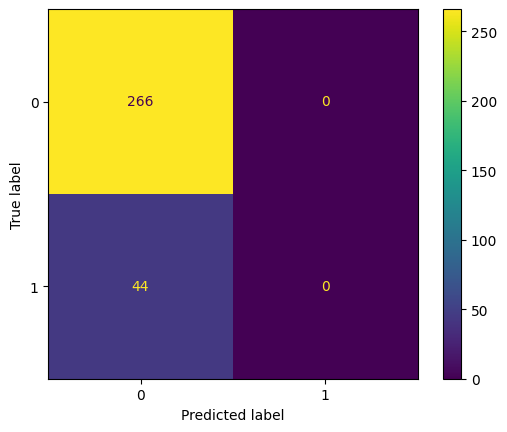

In [ ]:
cmd=ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot()
plt.show()

**My logistic regression model has a accuracy of 85.8%.**

**Decision Tree Classifier Model**

**The second model I will try for classification task is the Decision tree model.I have used sklearns DecisionTreeClassifier algorithm to build the model.I train the model with same train set and check the prediction using test set.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtmodel=DecisionTreeClassifier()

In [ ]:
dtmodel.fit(x_train,y_train)

DecisionTreeClassifier()

**I used the sklearns tree to visualize the tree model.**

[Text(0.5528114720394737, 0.9705882352941176, 'x[4] <= 2.764\ngini = 0.189\nsamples = 1238\nvalue = [1107, 131]'),
 Text(0.34503495065789475, 0.9117647058823529, 'x[0] <= 389250.0\ngini = 0.262\nsamples = 484\nvalue = [409, 75]'),
 Text(0.24270148026315788, 0.8529411764705882, 'x[4] <= 2.741\ngini = 0.235\nsamples = 455\nvalue = [393, 62]'),
 Text(0.23612253289473684, 0.7941176470588235, 'x[3] <= 67.244\ngini = 0.227\nsamples = 452\nvalue = [393, 59]'),
 Text(0.16180098684210525, 0.7352941176470589, 'x[3] <= 35.446\ngini = 0.219\nsamples = 448\nvalue = [392, 56]'),
 Text(0.03289473684210526, 0.6764705882352942, 'x[4] <= 0.595\ngini = 0.111\nsamples = 119\nvalue = [112, 7]'),
 Text(0.019736842105263157, 0.6176470588235294, 'x[4] <= 0.585\ngini = 0.219\nsamples = 24\nvalue = [21, 3]'),
 Text(0.013157894736842105, 0.5588235294117647, 'x[2] <= 2.5\ngini = 0.159\nsamples = 23\nvalue = [21, 2]'),
 Text(0.006578947368421052, 0.5, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.019736842

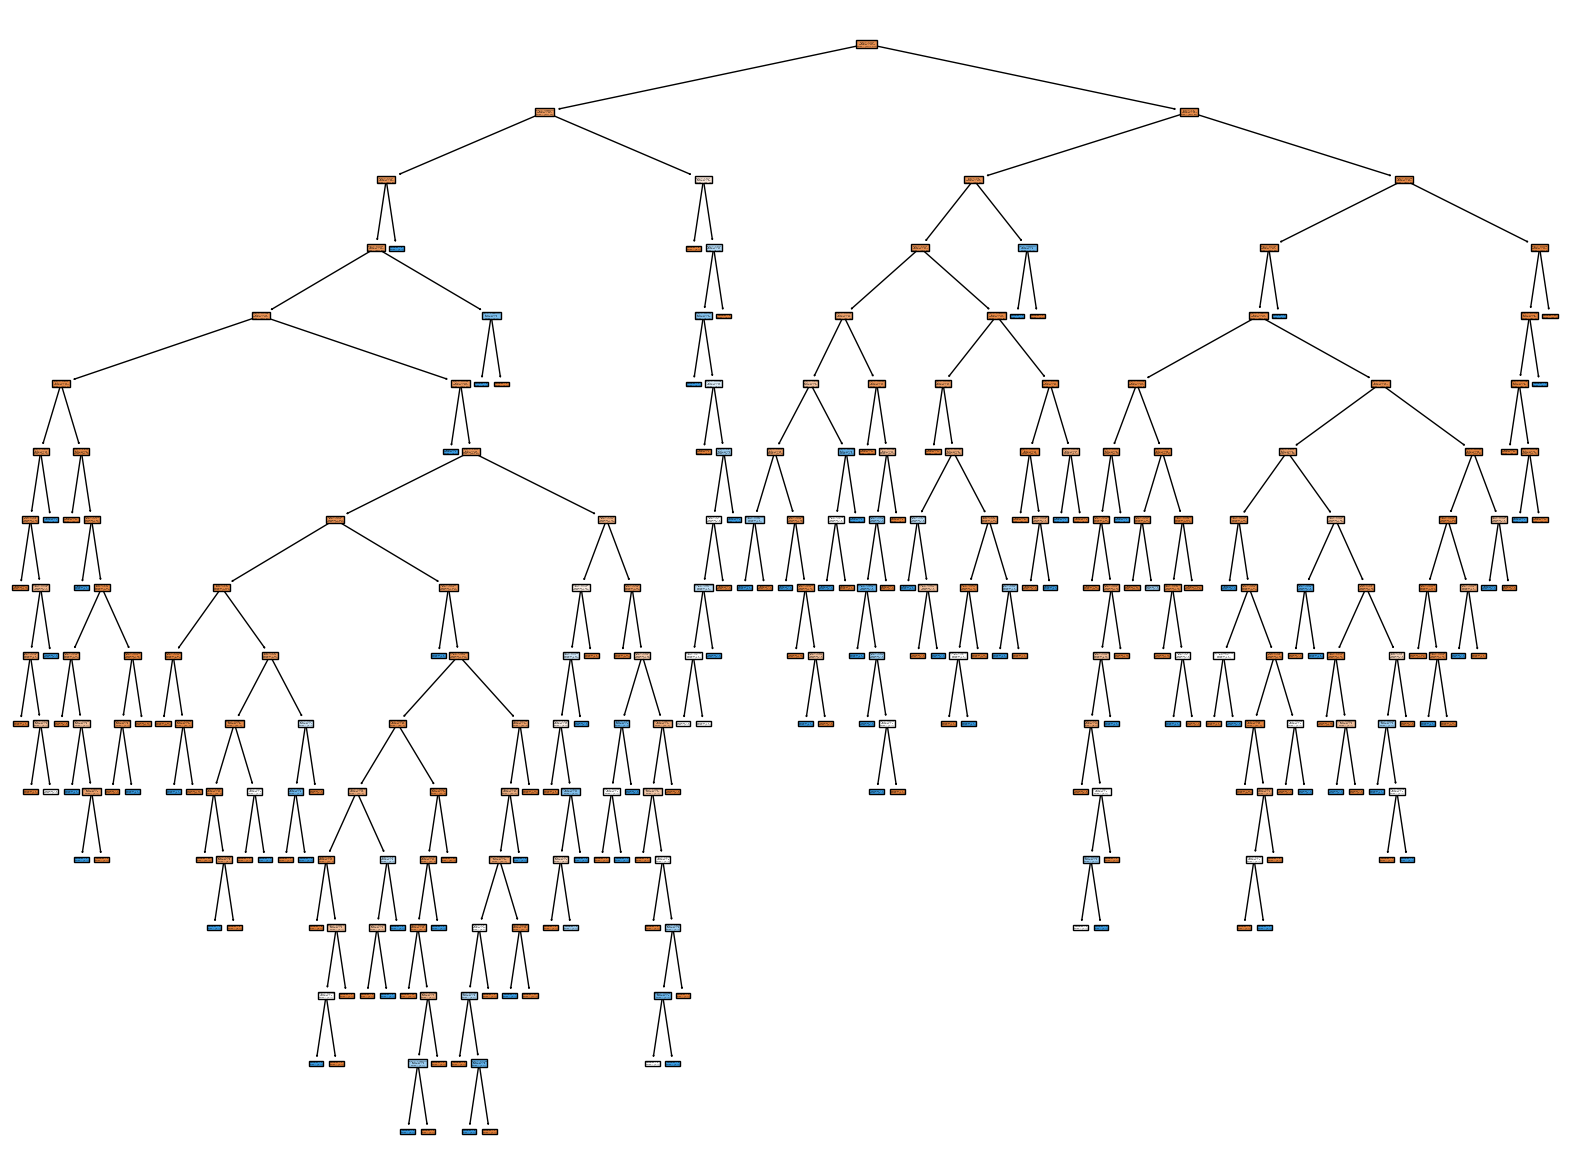

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(dtmodel,filled=True)

In [ ]:
dt_pred=dtmodel.predict(x_test)
dt_pred2=dtmodel.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
test_acc = accuracy_score(dt_pred, y_test)
train_acc = accuracy_score(dt_pred2, y_train)
print("test accuracy ",test_acc)
print("train accuracy ",train_acc)

test accuracy  0.8387096774193549
train accuracy  0.994345718901454


**After the prediction of decsion tree model. I got the accuracy score of 85.1%**.

**RANDOM FOREST CLASSIFIER**

**The third model I will try for classification task is the random forest model.I have used sklearns RANDOM FOREST CLASSIFIER algorithm to build the model.I train the model with same train set and check the prediction using test set.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ran_model=RandomForestClassifier()

In [ ]:
ran_model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
ran_pred=ran_model.predict(x_test)
ran_pred2=ran_model.predict(x_train)

**After the prediction of random forest model. I got the accuracy score of 92.5%.**

In [ ]:

ran_test_acc = accuracy_score(ran_pred, y_test)
ran_train_acc = accuracy_score(ran_pred2, y_train)
print("test accuracy ",ran_test_acc)
print("train accuracy ",ran_train_acc)

test accuracy  0.8903225806451613
train accuracy  0.994345718901454


**K NEIGHBORS CLASSIFIER MODEL (KNN MODEL)**


**The Fourth model I will try for classification task is the random forest model.I have used sklearns K NEIGHBORS CLASSIFIER MODEL algorithm to build the model.I train the model with same train set and check the prediction using test set.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

knn_train_predict = knn.predict(x_train)
knn_test_predict = knn.predict(x_test)

knn_test_acc = accuracy_score(knn_test_predict,y_test)
knn_train_acc = accuracy_score(knn_train_predict,y_train)
print("test accuracy ",knn_test_acc)
print("train accuracy ",knn_train_acc)

test accuracy  0.8483870967741935
train accuracy  0.9103392568659128


**After the prediction of KNN model. I got the accuracy score of 84.1%**.

In [ ]:
results_df={
    'ML_Models': ['logistic regression', 'Decision tree', 'RandonForest classifier', 'Knn'],
    'Train_accuracy': [0.8941841680129241, 0.994345718901454, 0.994345718901454,  0.9103392568659128],
    'Test_accuracy': [0.8580645161290322,0.8387096774193549,0.8903225806451613,0.8483870967741935]
}


**I am going to create a new dataframe for all the training accuracy scores and testing accuracy scores for all model for visualization of bar plot.**

In [ ]:
final_results= pd.DataFrame(results_df)
final_results.head()

,ML_Models,Train_accuracy,Test_accuracy
0,logistic regression,0.894184,0.858065
1,Decision tree,0.994346,0.838710
2,RandonForest classifier,0.994346,0.890323
3,Knn,0.910339,0.848387


**Bar plot of accuracy scores**

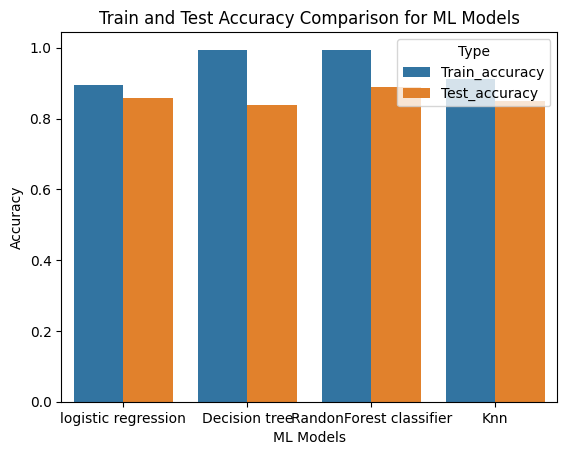

In [ ]:


# Melt the DataFrame to convert it to long format
df_melted = pd.melt(final_results, id_vars='ML_Models', var_name='Type', value_name='Accuracy')

# Create a grouped bar plot
sns.barplot(data=df_melted, x='ML_Models', y='Accuracy', hue='Type')

# Add labels and title
plt.xlabel('ML Models')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy Comparison for ML Models')

# Show the plot
plt.show()

**Conclusion:**

I built a machine learning-based classifier that predicts if a credit card application will get approved or not, based on the information provided in the application.

While building this credit card approval predictor, we learned about common preprocessing steps such as feature scaling, label encoding, and handling missing values. ****

**I have tried four different classification models for our credit card approval prediction task. The train and test accuracy of the models is summarized in the Figure above. We have obtained the best test data accuracy from the random forest (92.5)and descion tree(91.6).**

According to my initial and final analysis, I got random forest model and descion tree model all my top 2 model and logistic regression model as my third model.

As my initial and final analysis annual income played an important role in credit card approval. the higher the annual income the higher the chance of getting the credit card approved. ****

**SQL**

In [ ]:
import duckdb
conn=duckdb.connect()
conn.register('df_',df3_copy)
conn.execute("select * from df3_copy").fetchdf().head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,age,Employed_years
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,Laborers,2,1,51.394935,-0.000000
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,37.117043,1.604381
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,43.916063,1.604381
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,37.117043,1.604381
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,Laborers,2,1,37.117043,1.604381


**1.Group the customer based in their income type and find the average of their annual income.**

In [ ]:
conn.execute("select Type_Income,avg(Annual_income) from df3_copy group by Type_Income").fetchdf().head(10)

,Type_Income,avg(Annual_income)
0,Pensioner,155713.746487
1,Working,181191.434321
2,State servant,211422.413793
3,Commercial associate,233653.135917


2**.find the female owners of car and property.**

In [ ]:
conn.execute("SELECT Ind_ID,GENDER,Car_Owner,Propert_Owner FROM df3_copy where GENDER='F' and Car_Owner='Y' and Propert_Owner='Y'").fetchdf().head(10)

,Ind_ID,GENDER,Car_Owner,Propert_Owner
0,5018498,F,Y,Y
1,5018501,F,Y,Y
2,5018503,F,Y,Y
3,5024213,F,Y,Y
4,5036660,F,Y,Y
5,5053254,F,Y,Y
6,5065348,F,Y,Y
7,5068389,F,Y,Y
8,5068651,F,Y,Y
9,5069216,F,Y,Y


**3.find the male customers who are staying with their families.**

In [ ]:
conn.execute("SELECT Ind_ID,GENDER,Family_Members from df3_copy where Family_Members>0 and GENDER='M'").fetchdf().head(10)

,Ind_ID,GENDER,Family_Members
0,5008827,M,2
1,5010864,M,3
2,5010868,M,3
3,5010869,M,1
4,5021303,M,3
5,5021310,M,2
6,5021314,M,2
7,5021998,M,2
8,5022053,M,1
9,5022617,M,2


**4.please list the top five people with highest incocme.**

In [ ]:
conn.execute("select Ind_ID,GENDER,Annual_income from df3_copy order by Annual_income desc limit 5").fetchdf().head(10)

,Ind_ID,GENDER,Annual_income
0,5143231,F,1575000.0
1,5143235,F,1575000.0
2,5090470,M,900000.0
3,5079016,M,900000.0
4,5079017,M,900000.0


**5.how many married people are having bad credit.**

In [ ]:
conn.execute("select Ind_ID,Marital_status,label from df3_copy where Marital_status='Married' and label='1'").fetchdf().head(10)

,Ind_ID,Marital_status,label
0,5008827,Married,1
1,5009744,Married,1
2,5009746,Married,1
3,5009749,Married,1
4,5009752,Married,1
5,5009753,Married,1
6,5009754,Married,1
7,5009894,Married,1
8,5010864,Married,1
9,5010868,Married,1


**6.what is the highest education level and what is the total count.**

In [ ]:
conn.execute("select EDUCATION,count(*) as education_count from df3_copy where EDUCATION='Academic degree'group by EDUCATION ").fetchdf().head(10)

,EDUCATION,education_count
0,Academic degree,2


**7.between married males and females who are having bad credit.**

In [ ]:
conn.execute("SELECT GENDER,label,count(*) as credit_count from df3_copy where label='1' and Marital_status='Married'group by GENDER,label").fetchdf().head(10)

,GENDER,label,credit_count
0,F,1,63
1,M,1,51
